In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data=data.iloc[:,1:]

In [5]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
data1=data.drop('Award?',axis=1)

In [10]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [11]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data1)

In [12]:
scaled

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84374246],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.        ,
        0.83988425],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84784181],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.16879672],
       [0.03220189, 0.        , 0.        , ..., 0.01622481, 0.01886792,
        0.16867615],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16831444]])

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    cluster=km.fit(scaled)
    wcss.append(cluster.inertia_)
    

In [15]:
wcss

[898.270582200747,
 448.9989194445697,
 331.4330797303768,
 272.3925490904645,
 241.0771271672857,
 217.7645933737505,
 200.21335892711625,
 182.7385848617833,
 171.3191202054878,
 160.6957951955725]

In [16]:
import matplotlib.pyplot as plt

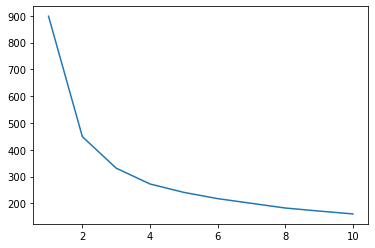

In [17]:
plt.plot(range(1,11),wcss)

In [18]:
from sklearn.cluster import KMeans

In [19]:
km=KMeans(n_clusters=3,random_state=42)
cluster=km.fit(scaled)

In [20]:
cluster

KMeans(n_clusters=3, random_state=42)

In [21]:
cluster.labels_

array([2, 2, 2, ..., 1, 0, 0])

In [22]:
cluster=cluster.labels_

In [23]:
n_data=pd.DataFrame(cluster)

In [24]:
n_data

,0
0,2
1,2
2,2
3,2
4,1
...,...
3994,0
3995,0
3996,1
3997,0


In [25]:
data['Cluster']=n_data

In [26]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [27]:
data['Cluster'].value_counts()

1    1415
0    1415
2    1169
Name: Cluster, dtype: int64

In [28]:
data_main=data.loc[:,['Balance','Bonus_miles','Award?','Cluster']]

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='Award?', ylabel='Count'>

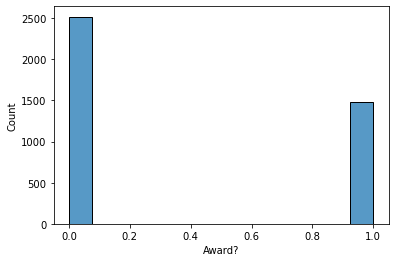

In [36]:
sns.histplot(data['Award?'])

In [40]:
data[data['Cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1129,1625,0,1,1,1,1375,4,0,0,1547,0,0
1431,44665,0,1,1,1,333,2,333,2,3601,0,0
1549,65021,0,2,1,1,10369,12,0,0,3547,0,0
1551,18433,0,1,1,1,3174,9,0,0,3930,0,0
1552,6341,0,1,1,1,3658,12,0,0,3706,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [41]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(scaled,km.fit_predict(scaled))

0.40383644873633734